<a href="https://colab.research.google.com/github/nishah8/dataandpython/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE PROJECT
Working with movie dataset to get information about ranks and genre

---


---



## Nirali Shah
Date: Sep 2023
---



## Objectives

This dataset has movies with the name of the directors, genres and the ranking. I want to find if there is any relation of high rank to the genres.
---


## The dataset
_reference and link to the source of the data_
* description of the dataset
* description of the processing with code in the box below to show summary information about the data

---



In [1]:
## describe the dataset (number of records, statistics, columns, etc)
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
moviedf = pd.read_csv(url)
moviedf.drop(moviedf.columns[0], axis=1,inplace = True)
print(moviedf)
print()
print(moviedf.info())

       first_name    last_name                                name  year  \
0             Les  12 Poissons                Rondo pour trompette  2002   
1         Lejaren     a'Hiller            Sleep of Cyma Roget, The  1920   
2        Khairiya    A-Mansour                    Churches in Iraq  1988   
3         Ricardo     A. Solla                            Foto, La  2001   
4         Ricardo     A. Solla                            Foto, La  2001   
...           ...          ...                                 ...   ...   
368889      Yusuf         Ünal                      Kalbim agliyor  1988   
368890      Ahmet        Ündag                 Ve gnese kan siradi  1972   
368891       Idil         Üner  Liebenden vom Hotel von Osman, Die  2001   
368892     Yüksel        Ünsal                   Evvel zaman iinde  1951   
368893     Yüksel        Ünsal                   Evvel zaman iinde  1951   

        rank        genre  
0        NaN        Short  
1        NaN        Drama  
2  

## Cleaning the data
_what will you do to get the data ready for analysis_
* sorting
* removing null data
* forming new data tables
* ...
---


In [40]:
## data cleaning code
# only going to work with the movies which have ranking

#making a list of movies that are ranked
ranked_movies = moviedf.dropna(subset=['rank'])
ranked_movies = ranked_movies.sort_values(by=['rank','year'],ascending = False)
ranked_movies = ranked_movies.reset_index(drop=True)
ranked_movies['full name'] = ranked_movies['first_name'] + ' ' + ranked_movies['last_name']
ranked_movies = ranked_movies.drop(columns=['first_name','last_name'])  #this is to consolidate first_name & last_name columns into a single column
print(ranked_movies.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113376 entries, 0 to 113375
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   name       113376 non-null  object 
 1   year       113376 non-null  int64  
 2   rank       113376 non-null  float64
 3   genre      113376 non-null  object 
 4   full name  113376 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB
None


## Analysing the data
_what analysis are you doing and why_
* producing summary statistics
* printing calculated statistics
* data analysis calculations (e.g. regression, correlation)
* ...

---



In [41]:
## analysis code here

#summary statistics of all the ranked movies
print(ranked_movies['rank'].describe())
print()


#number of movies per genre
gmov = ranked_movies.groupby('genre').size().reset_index(name='count')
print(gmov)
print()

#mean rank per genre
mean_rank_by_genre = ranked_movies.groupby('genre')['rank'].mean()
print(mean_rank_by_genre)
print()

#name of all the directors with movies ranked >9
high_ranked = ranked_movies[ranked_movies['rank'] >= 9].copy()
directors = high_ranked['full name'].unique()
print('number of directors who have movies ranking over 9:',len(directors))
print()
#print()
#for director in directors:   (this is in case you want to see list of all the directors)
    #print(director)

#year with highest number of movies ranked >9
year_counts = high_ranked.groupby('year')['name'].nunique() #gets unique movies names per year
year_with_highest_count = year_counts.idxmax()
print("Year with the highest number of movies ranked over 9:", year_with_highest_count)
print()

# Genre with highest movies of rank over 9
genre_counts = high_ranked['genre'].value_counts()
genre_with_highest_count = genre_counts.idxmax()
print("Genre with the highest number of movies ranked over 9:", genre_with_highest_count)
print()

# number of rank 9 or above movies by each unique directors and finding the most succesful director
movie_counts = high_ranked.groupby('full name')['name'].nunique() #gets unique movies names per director
sorted_counts = movie_counts.sort_values(ascending=False)
director_with_highest_count = sorted_counts.idxmax()
print("Director with the highest count of movies ranked over 9:", director_with_highest_count, 'with', sorted_counts[0], 'movies on the list')
print()

# movies with highest rank
max_rank = high_ranked['rank'].max()
highest_rank_rows = high_ranked[high_ranked['rank'] == max_rank] #selects rows with the highest rank
unique_movies = highest_rank_rows.drop_duplicates(subset='name', keep='first')[['name', 'full name', 'year']]
print('List of movies with the hightest rank of',max_rank)
print(unique_movies)
print()



count    113376.000000
mean          5.995124
std           1.540330
min           1.000000
25%           5.100000
50%           6.200000
75%           7.100000
max           9.900000
Name: rank, dtype: float64

          genre  count
0        Action   5873
1     Adventure   3932
2     Animation   4727
3        Comedy  20633
4         Crime   4488
5   Documentary   4296
6         Drama  24696
7        Family   4845
8       Fantasy   2123
9     Film-Noir    415
10       Horror   4227
11        Music    908
12      Musical   2491
13      Mystery   2012
14      Romance   5476
15       Sci-Fi   2699
16        Short   9894
17     Thriller   5440
18          War   1837
19      Western   2364

genre
Action         5.365895
Adventure      5.619379
Animation      6.553628
Comedy         5.923196
Crime          5.861007
Documentary    6.659544
Drama          6.146169
Family         6.323344
Fantasy        5.882289
Film-Noir      6.702892
Horror         4.738325
Music          6.458921
Musical   

## Visualising the data
_graphical or textual visualisation of the data_

---



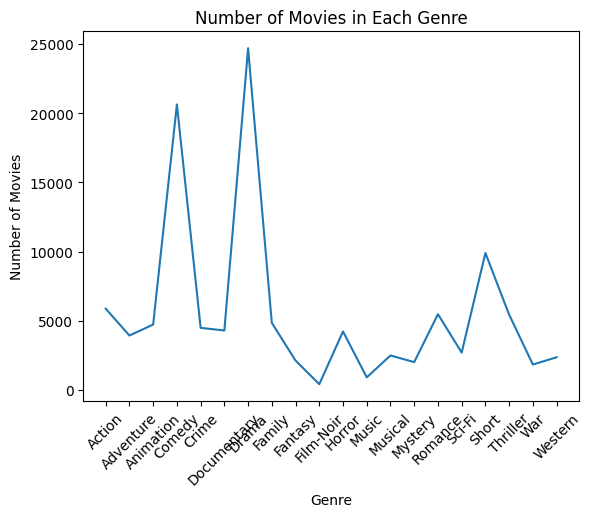

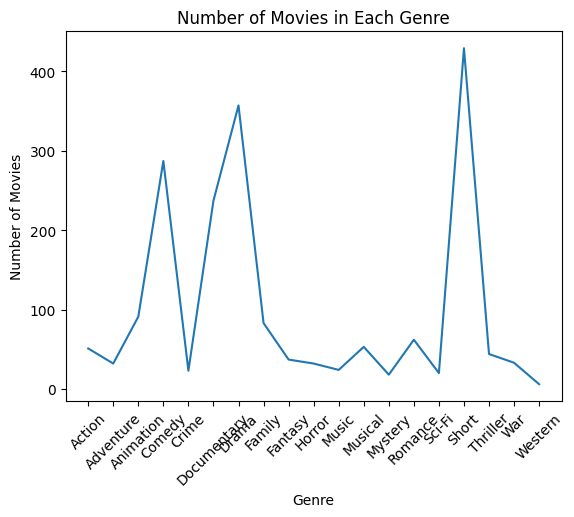

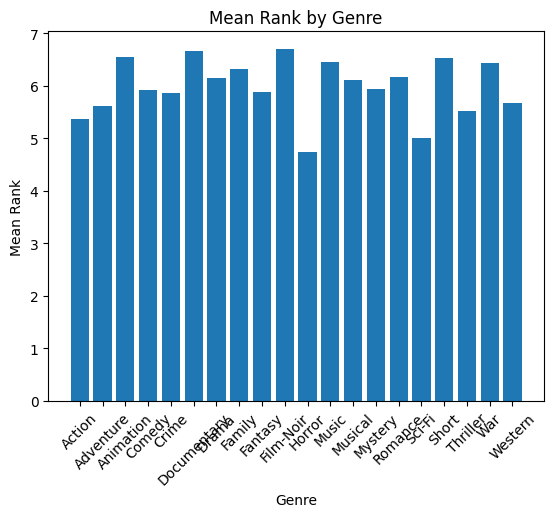

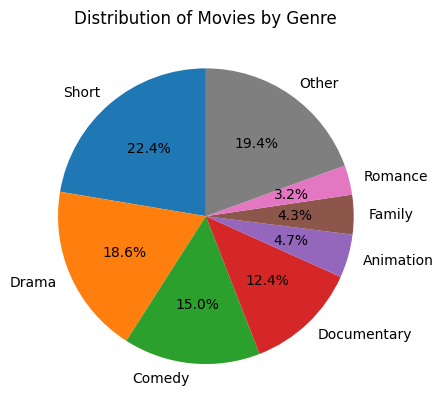

Genres in 'Other': Musical, Action, Thriller, Fantasy, War, Horror, Adventure, Music, Crime, Sci-Fi, Mystery, Western



In [42]:
## visualisation code here

# number of movies in each genre visualised.
plt.plot(gmov['genre'], gmov['count'])
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=45)
plt.show()

#number of movies in each genre visualised only for highly ranked movies
gmov_high = high_ranked.groupby('genre').size().reset_index(name='count')
plt.plot(gmov_high['genre'], gmov_high['count'])
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.xticks(rotation=45)
plt.show()

# Plotting a chart of mean rank and genre
plt.bar(mean_rank_by_genre.index, mean_rank_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Mean Rank')
plt.title('Mean Rank by Genre')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart of movies by genres in the highest ranked list
genre_counts = high_ranked['genre'].value_counts()
threshold = 0.03  # 3%
small_slices = genre_counts[genre_counts / genre_counts.sum() < threshold]
other_count = small_slices.sum()
other_genres = list(small_slices.index)
genre_counts = genre_counts[~genre_counts.index.isin(other_genres)]
genre_counts['Other'] = other_count
plt.pie(genre_counts, labels=genre_counts.index, autopct='%.1f%%', startangle=90)
plt.title('Distribution of Movies by Genre')
plt.show()
other_genres_str = ', '.join(other_genres) # to remove [] &, and have cleaner output
print("Genres in 'Other':", other_genres_str)
print()


# Summary
this dataset shows short films have the highest rating. we have figured out the director with highest number of highly ranked movies, the most successful genre and mean ratings per genre.